## Absorbing Markov Chain 
##### Keywords: Linear algebra, Markov Chain

In [1]:
%matplotlib inline
import numpy as np
from numpy import linalg as lin
import os
cwd      = os.getcwd() 
datapath = cwd + u'/data/'

### Consider a rat in a maze with 3 cells, indexed as 1,2,3 and the outside (freedom), indexed by 4 (that can only be reached via cell 3).  The rat starts initially in a given cell and then takes a move to another cell, continuing to do so until finally reaching freedom. 
### Goal: simulate rat moving around and count steps it takes to get to freedom
<img src="4rat.png" alt="Drawing" style="width: 200px;"/>


In [2]:
S = [1,2,3,4]
import random
import numpy as np

def steps(i):
    if(i==1):
        next_move = 2
        return 1+steps(next_move)
    
    if(i == 2):
        next_move = random.choice([1,3,4])
        return 1+steps(next_move)
        
    if(i == 3):
        next_move = 2
        return 1+steps(next_move)
    
    if(i == 4):
        return 0

### Count in general, on average how many steps it takes to start from cell 2 and ends with freedom
### Run N = 100 times, each time compute average of 50 moves
<img src="4rat.png" alt="Drawing" style="width: 200px;"/>


start move from cell 1


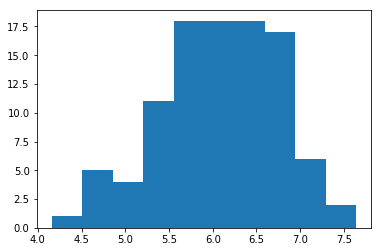

6.0752
start move from cell 2


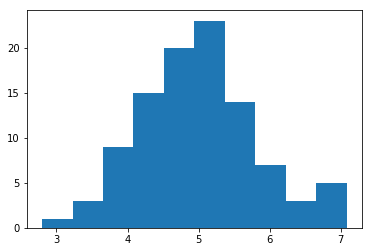

4.9852
start move from cell 3


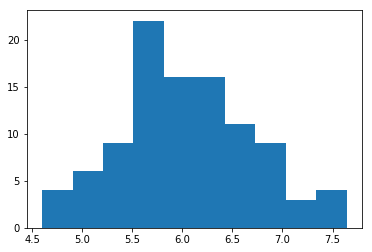

6.034


In [11]:
import matplotlib.pyplot as plt

for start in [1,2,3]:
    Run_total = np.zeros(100)
    N_move    = 50
    print("start move from cell", start)
    for each_run in range(100):
        move = np.zeros(N_move)
        for each_move in range(N_move):
            move[each_move] = steps(start)
        Run_total[each_run] = np.mean(move)
    plt.hist(Run_total,bins = 10)
    plt.show()
    print(Run_total.mean())


### 1-step transition matrix associated with this problem
<img src="4rat.png" alt="Drawing" style="width: 200px;"/>


$$
P = \begin{pmatrix}
0 & 1 & 0 & 0\\
1/3 & 0 & 1/3 & 1/3\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}
$$


In [3]:
P = np.array(
[[0,1,0,0],
 [1/3,0,1/3,1/3],
 [0,1,0,0],
 [0,0,0,1] 
]
)
print(P)

[[0.         1.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.         1.         0.         0.        ]
 [0.         0.         0.         1.        ]]


In [4]:

S = [1,2,3,4]
N_absorption = 1


Q = np.matrix(P[:len(S)-N_absorption, :len(S)-N_absorption])
print(Q)


R = np.matrix(P[:len(S)-N_absorption,-N_absorption:])
print(R
     )

diff = np.matrix(np.eye(len(Q)) - Q)
N    = diff**(-1)
print(diff)
print(N)

[[0.         1.         0.        ]
 [0.33333333 0.         0.33333333]
 [0.         1.         0.        ]]
[[0.        ]
 [0.33333333]
 [0.        ]]
[[ 1.         -1.          0.        ]
 [-0.33333333  1.         -0.33333333]
 [ 0.         -1.          1.        ]]
[[2. 3. 1.]
 [1. 3. 1.]
 [1. 3. 2.]]


###  the expected time of being absorbed is Nc
where $c = (1,1,...,1)^T$
### The probability of being absorbed by one of the absorption states is NR

In [5]:
c = np.ones((len(N),1))
Tabs = N*c
Pabs = N*R
print(Tabs)
print(Pabs)

[[6.]
 [5.]
 [6.]]
[[1.]
 [1.]
 [1.]]


### Drunkard's examples
<img src="drunkard.png" alt="Drawing" style="width: 300px;"/>



In [6]:
S = [0,1,2,3,4]
def steps_drunkard(i):
    #print(i,'->')
    if(i == 3 or i == 4):
        return 0
    
    if(i == 0):
        next_move = random.choice([3,1])
        return 1 + steps_drunkard(next_move)

    if(i == 1):
        next_move = random.choice([0,2])
        return 1 + steps_drunkard(next_move)
    
    if(i == 2):
        next_move = random.choice([4,1])
        return 1 + steps_drunkard(next_move)

steps_drunkard(2)

3

<img src="drunkard.png" alt="Drawing" style="width: 300px;"/>


In [10]:
S = [0,1,2,3,4]
N_exp = 100
N_simulations = 50
N_s   = 5
experiments = np.zeros((N_s,N_exp))

In [11]:
for block in S:
    for i in range(N_exp):
        each_experiment = np.zeros(N_simulations)
        for j in range(N_simulations):
            each_experiment[j] = steps_drunkard(block)
        experiments[block,i] = np.mean(each_experiment)


<img src="drunkard.png" alt="Drawing" style="width: 300px;"/>


0 number of moves:  3.0416


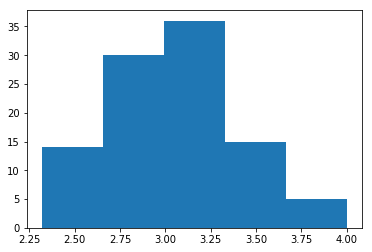

1 number of moves:  4.1008000000000004


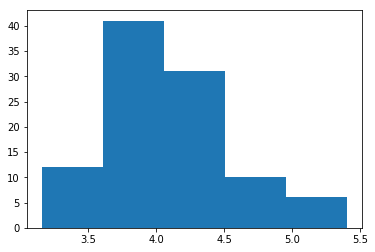

2 number of moves:  3.0012


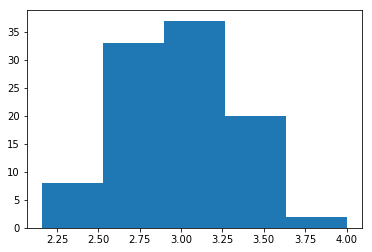

3 number of moves:  0.0


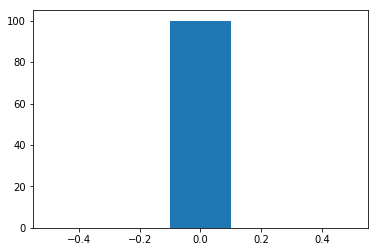

4 number of moves:  0.0


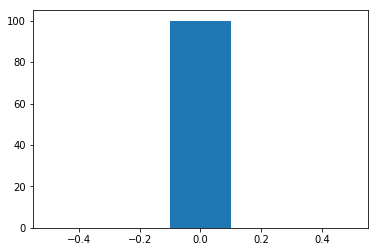

In [13]:
import matplotlib.pyplot as plt
for block in S:
    plt.hist(experiments[block,:],bins = 5)
    print(block,'number of moves: ', np.mean(experiments[block,:]))
    plt.show()